## Boston Housing Price Prediction 
Les work on a new
dataset, the Housing Dataset, which contains information about houses in the
suburbs of Boston collected by D. Harrison and D.L. Rubinfeld in 1978.
<img src="Images/boston_house.jpg" width="50%">

Source: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's
</pre>

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('./Datasets/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Visualizing the important characteristics of a dataset

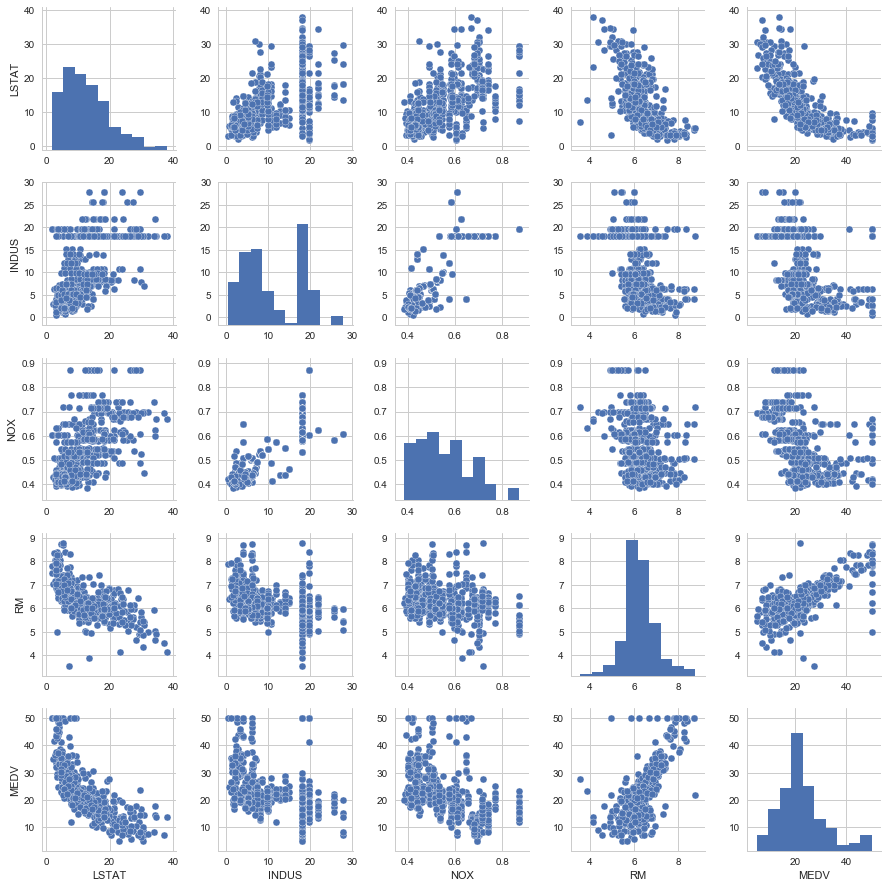

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

## Introducing Correlation Matrix
The correlation matrix is a square matrix that contains the Pearson product-moment
correlation coefficients (often abbreviated as Pearson's r), which measure the linear
dependence between pairs of features. The correlation coefficients are bounded
to the range -1 and 1. Two features have a perfect positive correlation if $r=1$, no
correlation if $r=0$ and a perfect negative correlation if $r=-1$ respectively. As
mentioned previously, Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  




\begin{equation}
r=\frac{\sum_{i=1}^n[(X^{(i)}-\mu_{x}) (y^{(i)}-\mu_{y})]}{\sqrt{\sum_{i=1}^n(X^{(i)}-\mu_{x})^2}\sqrt{\sum_{i=1}^n(y^{(i)}-\mu_{y})^2}}  = \frac{\sigma_{xy}}{\sigma_{x}\sigma{y}}
\end{equation}

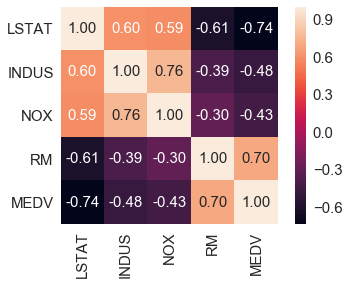

In [5]:
import numpy as np


cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

### Estimating the coefficient of a regression model via scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression


In [7]:
X = df[['RM']].values
y = df['MEDV'].values

In [8]:
slr = LinearRegression()
slr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

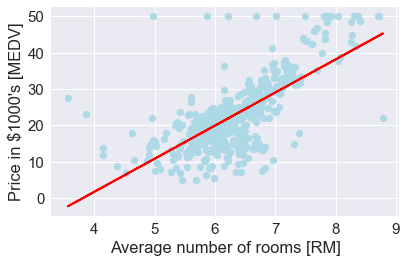

In [10]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

## Evaluating the performance of linear regression models

Then how to evaluate the performace of the model ?



\begin{equation}
  SS_{res}=\sum_{i=1}^{n} \left({y_{i}-f(X_{i})}\right)^{2} 
\end{equation}




In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [16]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [17]:
print ('Residual sum of squares Train: %.2f' % np.mean((slr.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((slr.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 42.16
Residual sum of squares Test: 47.03


## Multiple Regression

In [18]:
X = df[['RM','LSTAT']].values
y = df['MEDV'].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print ('Residual sum of squares Train: %.2f' % np.mean((slr.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((slr.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 29.59
Residual sum of squares Test: 32.73


## Polynomial Regression

In [20]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [21]:
def PolynomialRegression(degree):
    
    
    X = df[['RM']].values
    y = df['MEDV'].values
    
    quadratic_featurizer = PolynomialFeatures(degree)
    X_quadratic = quadratic_featurizer.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_quadratic, y, test_size=0.3, random_state=0)
    
    regressor_quadratic = LinearRegression()
    regressor_quadratic.fit(X_train, y_train)
        
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_train)- y_train) ** 2))
    print ('Residual sum of squares: %.2f' % np.mean(( regressor_quadratic.predict(X_test)- y_test) ** 2))
        

In [22]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

In [23]:
i = interact(PolynomialRegression, degree=(1,100))

A Jupyter Widget